# Example notebook for generating masks with pyMOE 

In the following we exemplify how to generate masks using the generate module:
* Circular aperture (binary + save into image file) 
* Rectangular aperture  (binary + save into image file)
* Fresnel Zone Plate (binary + save into image file)
* Fresnel lens (with arbitrary number of layers + save into GDSII file using gds_klops module) 
* Arbitrary phase function (with arbitrary number of layers + save into GDSII file using gds_klops module) 

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import warnings
warnings.filterwarnings('ignore')

## Circular aperture 

In [2]:
from generate import *  
from export import * 

<IPython.core.display.Javascript object>


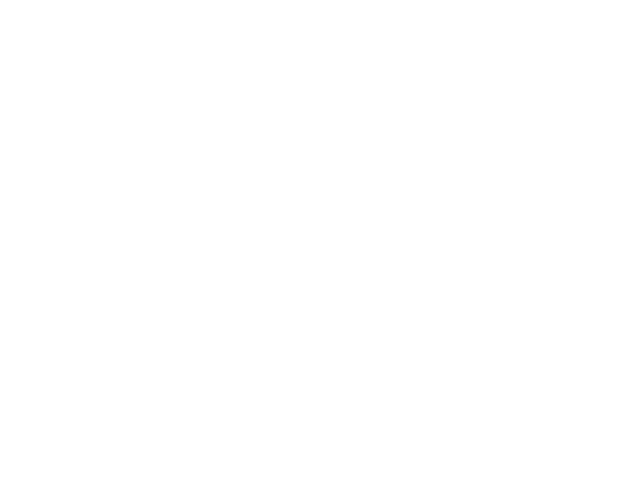

<IPython.core.display.Javascript object>


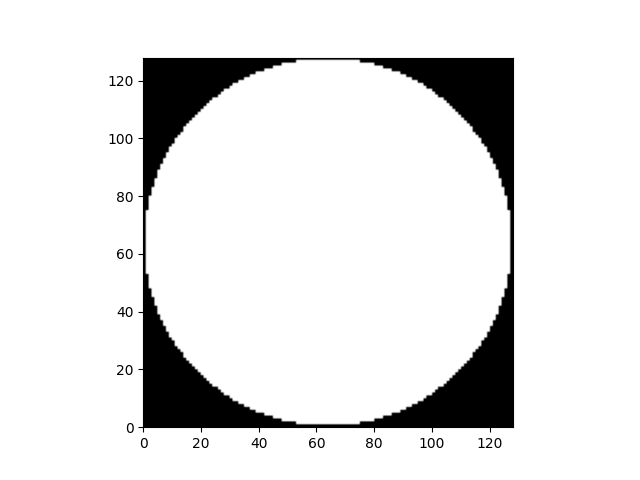

<IPython.core.display.Javascript object>


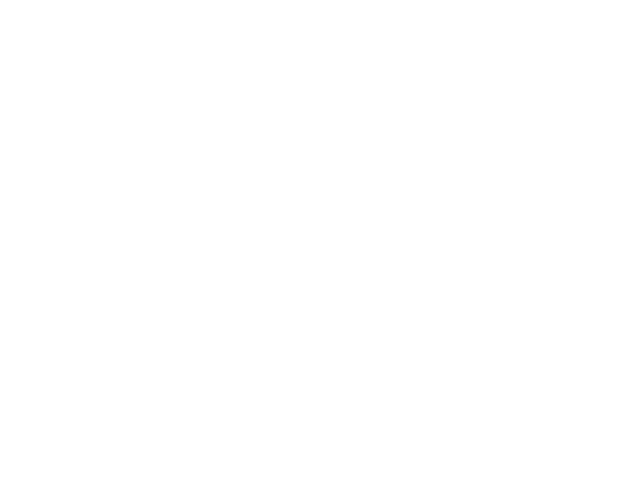

<IPython.core.display.Javascript object>


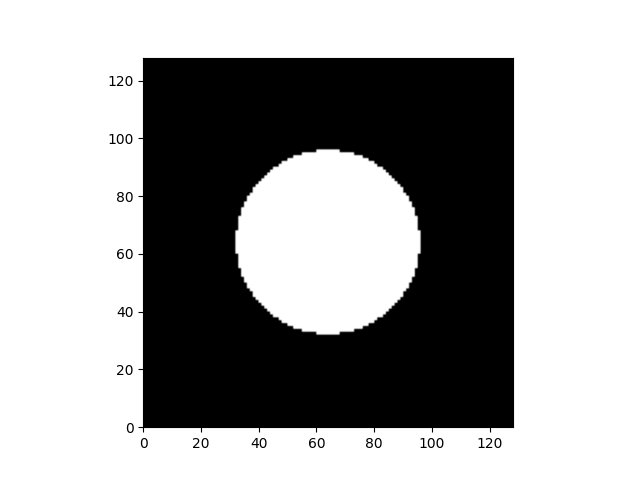

In [3]:
###Attention, the circular and rectangular apertures only save into img files 

#make circular apertures (returns also the 2D array)
npix = 128
xsiz = 128
ysiz = 128

circ = circ_mask(npix, xsiz, ysiz, partial = 0.5, filename = "circ.png" ,plotting=True )
circ2 = circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ2.png" ,plotting=True )


<IPython.core.display.Javascript object>


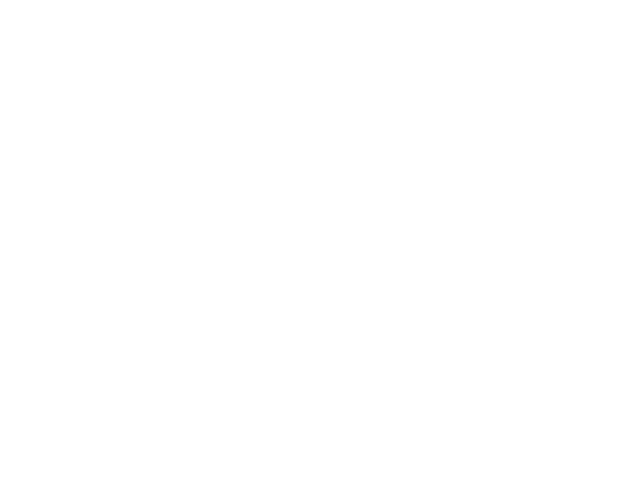

<IPython.core.display.Javascript object>


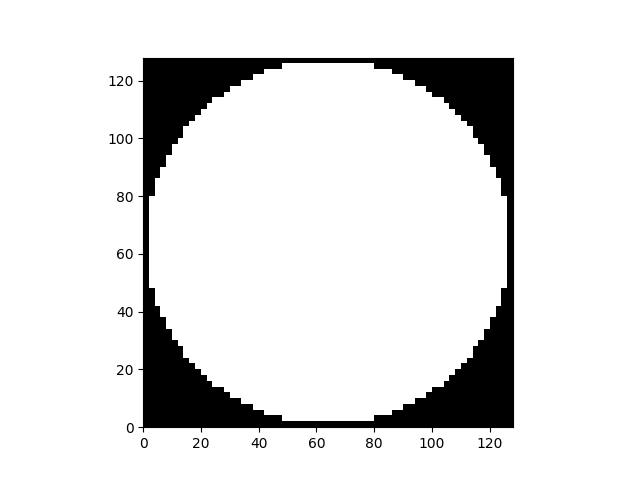

<IPython.core.display.Javascript object>


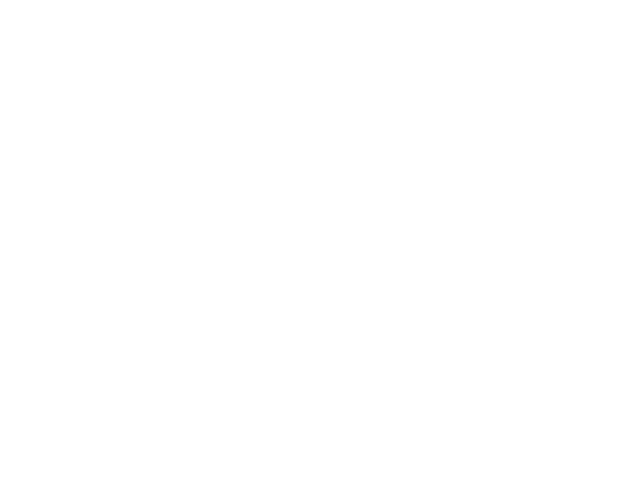

<IPython.core.display.Javascript object>


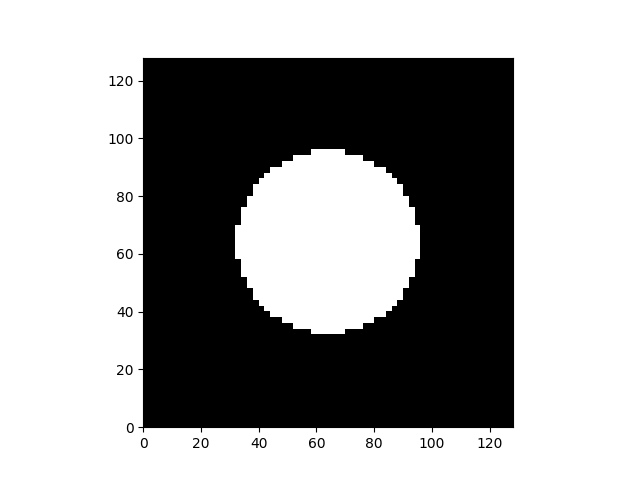

In [4]:
npix = 64
xsiz = 128
ysiz = 128

circ3 = circ_mask(npix, xsiz, ysiz, partial = 0.5, filename = "circ3.png" ,plotting=True );
circ4 = circ_mask(npix, xsiz, ysiz, partial = 0.25, filename = "circ4.png" ,plotting=True );


## Rectangular aperture 

<IPython.core.display.Javascript object>


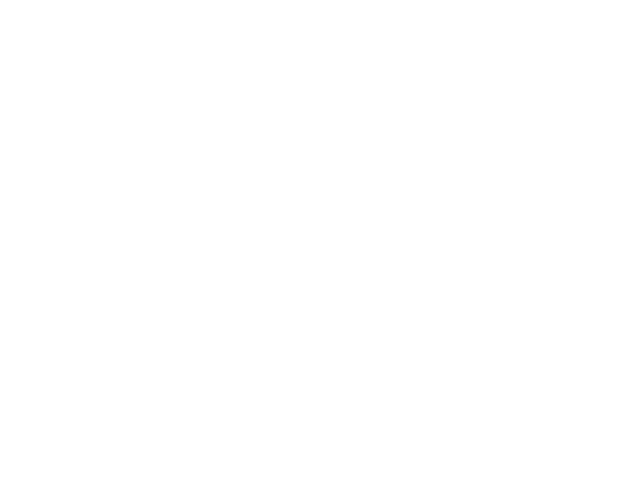

<IPython.core.display.Javascript object>


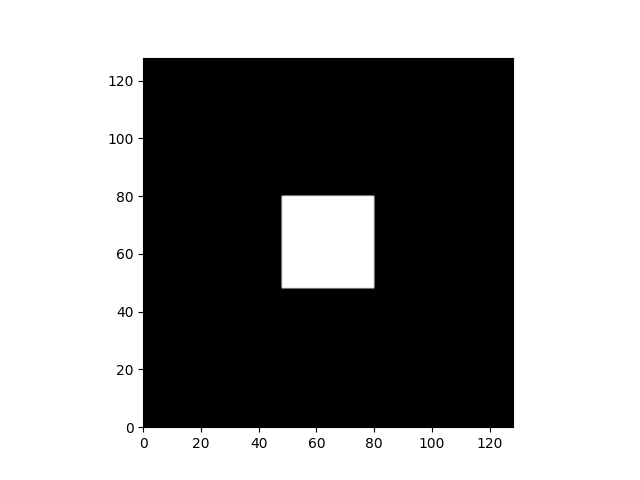

<IPython.core.display.Javascript object>


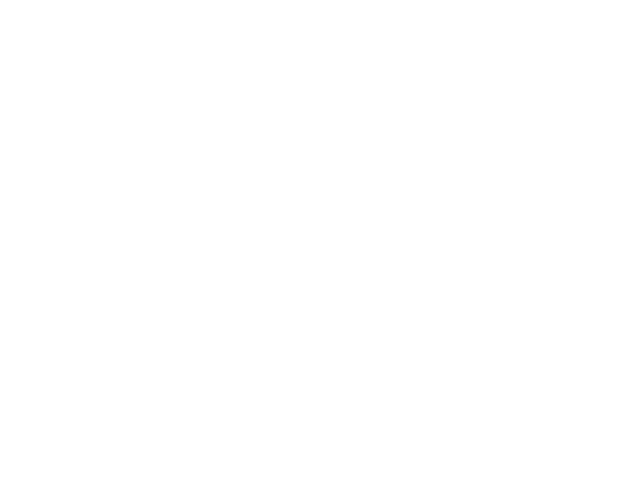

<IPython.core.display.Javascript object>


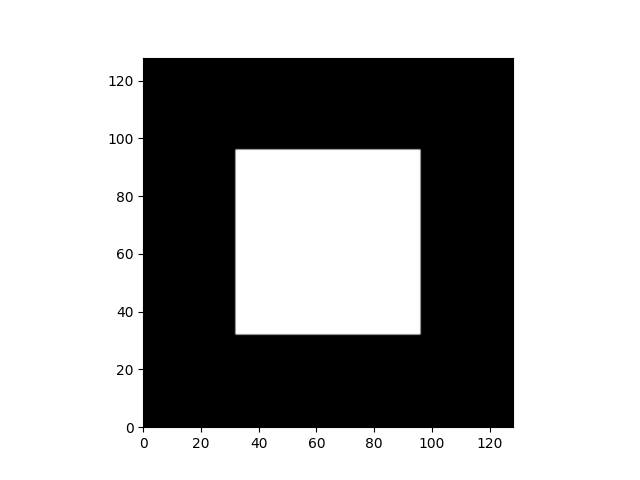

In [5]:
npix = 128
xsiz = 128
ysiz = 128

rect = rect_mask(npix, xsiz, ysiz, partial =0.25, filename= "rect.png", plotting=True )
rect2 = rect_mask(npix, xsiz, ysiz, partial =0.5, filename= "rect2.png", plotting=True )


<IPython.core.display.Javascript object>


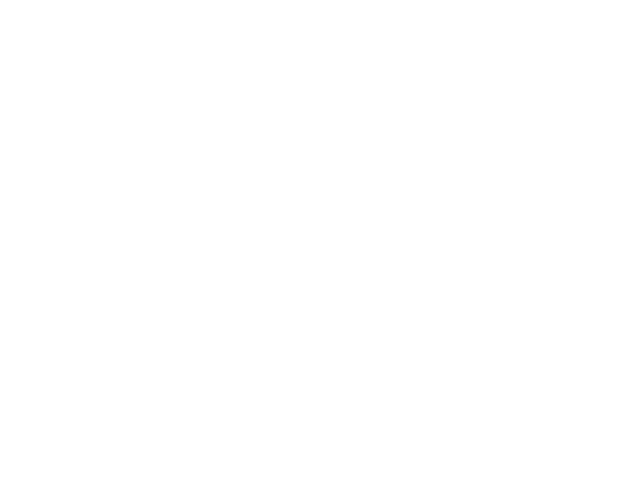

<IPython.core.display.Javascript object>


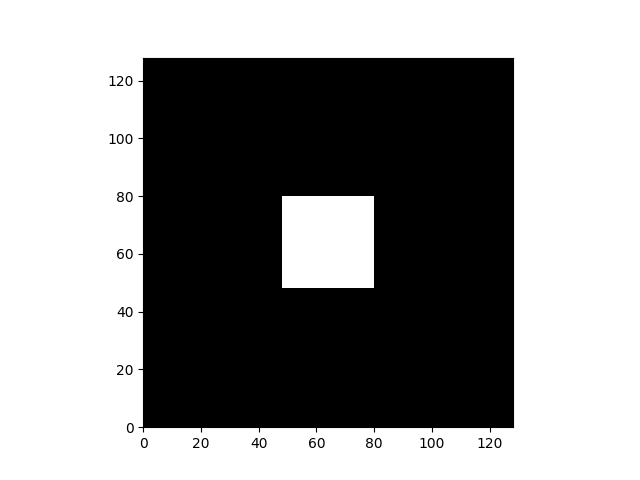

<IPython.core.display.Javascript object>


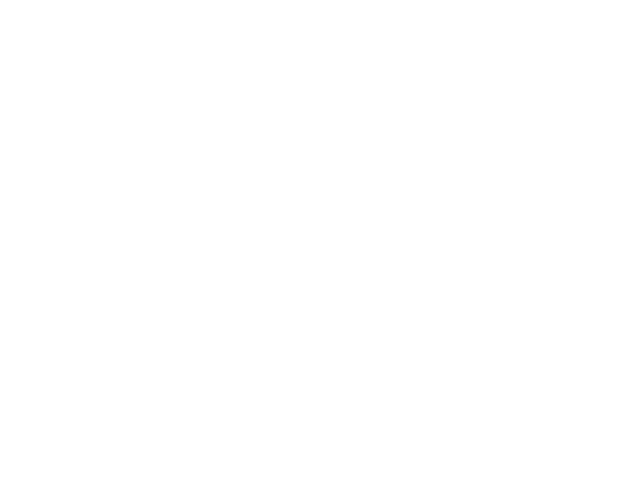

<IPython.core.display.Javascript object>


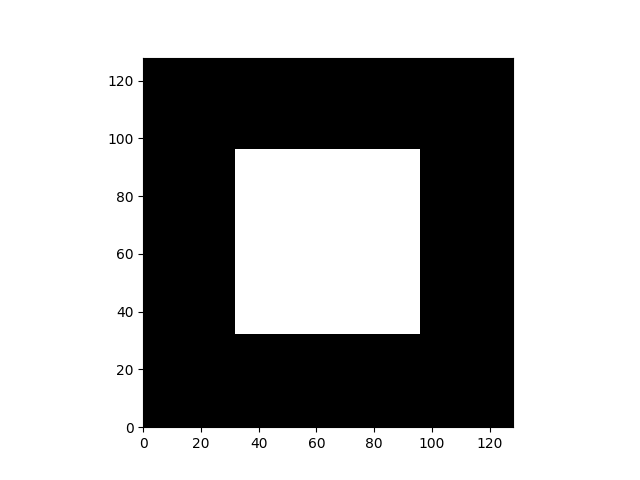

In [6]:
npix = 64
xsiz = 128
ysiz = 128

rect3 = rect_mask(npix, xsiz, ysiz, partial =0.25, filename= "rect3.png", plotting=True )
rect4 = rect_mask(npix, xsiz, ysiz, partial =0.5, filename= "rect4.png", plotting=True )


## Fresnel Zone Plate

<IPython.core.display.Javascript object>


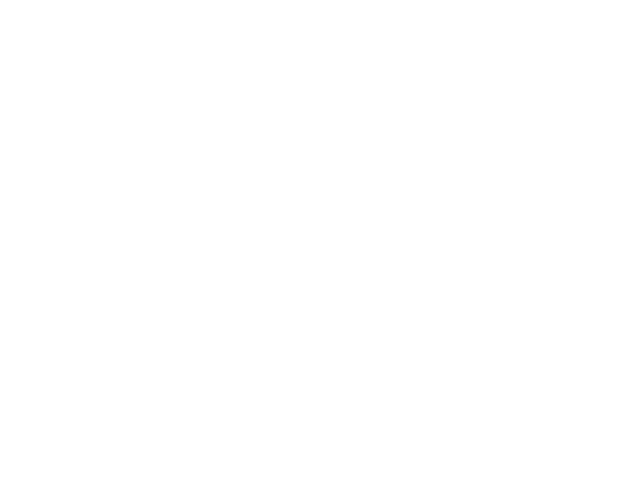

<IPython.core.display.Javascript object>


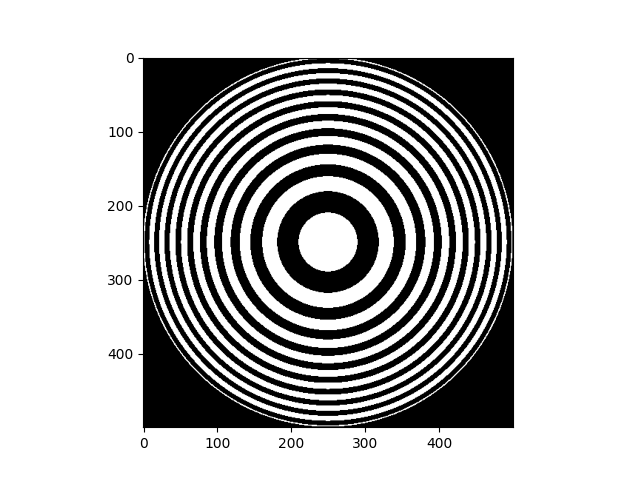

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [7]:
####generate a fresnel zone plate 

npix = 500 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size in pixels 
ysiz = 500 #y-size in pixels 
imgname = 'fresnel_zone_plate.tiff' # name of gds file

fzp_mask(npix, foc, lda, xsiz, ysiz, filename=imgname, plotting=True)

In [8]:
#Export the image into a gds  using export module 
infilxe = imgname
outfilxe = 'fresnel_zone_plate.gds'
pixelx = 1 #um 
pixely = 1 #um 
cellname = 'TOP'

grayim2gds(infilxe, outfilxe, pixelx, pixely,cellname, 0)

Exported the image file fresnel_zone_plate.tiff into fresnel_zone_plate.gds


## Fresnel phase mask

<IPython.core.display.Javascript object>


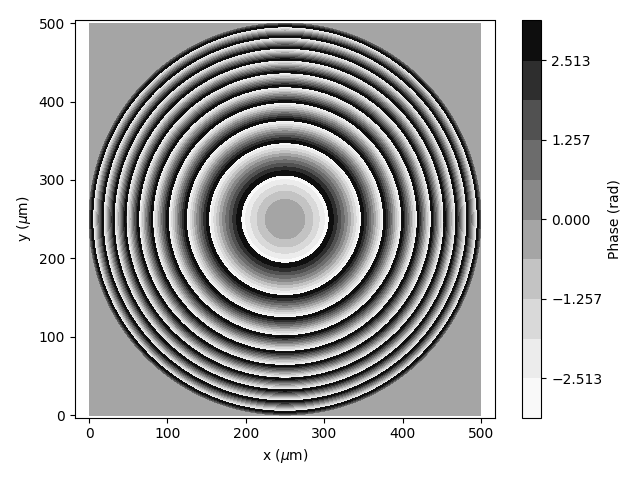

Passing contours into GDS. 
Saved the phase profile with 10 layers into the file fresnel_phase_mask.gds


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
####generate a fresnel phase mask and save it into gds  

npix = 5000 # nr of pixels 
foc = 5000 # focal distance in um 
lda = 0.6328 #wavelength in um 
xsiz = 500 #x-size in um 
ysiz = 500 #y-size in um 
n = 10  # number of gray levels 
gdsname = 'fresnel_phase_mask.gds' # name of gds file

fresnel_phase_mask(npix, foc, lda, xsiz, ysiz, n, filename=gdsname, plotting=True)

## Generate phase mask from arbitrary phase function 

<IPython.core.display.Javascript object>


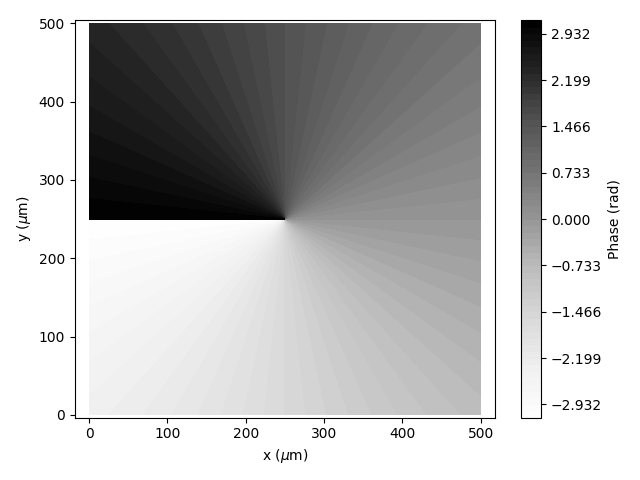

Passing contours into GDS. 
Saved the phase profile with 60 layers into the file spiral_phase_plate.gds


array([[-2.35619449, -2.35599441, -2.35579425, ..., -0.7857984 ,
        -0.78559824, -0.78539816],
       [-2.35639457, -2.35619449, -2.35599433, ..., -0.78559832,
        -0.78539816, -0.78519808],
       [-2.35659473, -2.35639465, -2.35619449, ..., -0.78539816,
        -0.785198  , -0.78499792],
       ...,
       [ 2.35659473,  2.35639465,  2.35619449, ...,  0.78539816,
         0.785198  ,  0.78499792],
       [ 2.35639457,  2.35619449,  2.35599433, ...,  0.78559832,
         0.78539816,  0.78519808],
       [ 2.35619449,  2.35599441,  2.35579425, ...,  0.7857984 ,
         0.78559824,  0.78539816]])

In [10]:
### Example with a spiral complex phase function 
#using the spiral function available in generate module 

import numpy as np 

npix = 5000  # number of pixels 
xsiz = 500 #x-size in number of pixels 
ysiz = 500 #y-size in number of pixels
ltop = 1 #topological number

#spiral mask is defined as  
#spiral(x,y,x0,y0,ltop)

n = 60 # number of gray levels 
gdsfile = "spiral_phase_plate.gds"  #name of gds file 

phase_mask(npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename=gdsfile, plotting=True ,prec = 1e-12, mpoints = 1e9)


<IPython.core.display.Javascript object>


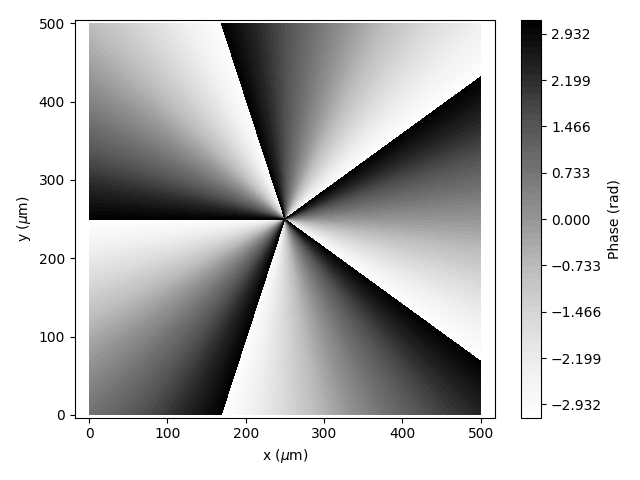

Passing contours into GDS. 
Saved the phase profile with 60 layers into the file spiral_phase_plate5.gds


array([[ 0.78539816,  0.78639856,  0.78739936, ...,  2.35419329,
         2.35519409,  2.35619449],
       [ 0.78439776,  0.78539816,  0.78639896, ...,  2.35519369,
         2.35619449,  2.35719489],
       [ 0.78339696,  0.78439736,  0.78539816, ...,  2.35619449,
         2.35719529,  2.35819569],
       ...,
       [-0.78339696, -0.78439736, -0.78539816, ..., -2.35619449,
        -2.35719529, -2.35819569],
       [-0.78439776, -0.78539816, -0.78639896, ..., -2.35519369,
        -2.35619449, -2.35719489],
       [-0.78539816, -0.78639856, -0.78739936, ..., -2.35419329,
        -2.35519409, -2.35619449]])

In [11]:
ltop = 5
phase_mask(npix, xsiz, ysiz,n, spiral, L=ltop, \
           filename='spiral_phase_plate'+str(ltop)+'.gds', plotting=True ,prec = 1e-12, mpoints = 1e9)